In [1]:
import numpy as np
import warnings
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)
warnings.filterwarnings("ignore")

import datetime
# BDay is business day, not birthday...
from pandas.tseries.offsets import BDay
pd.options.display.float_format = '{:,.2f}'.format

import plotly.express as px
import plotly.graph_objects as go


from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)


**Trading Journal Analysis**
--
**Day Trading Journal**

In [199]:
df1 = pd.read_csv("11040989_1.csv",parse_dates=["Activity Date"])
df2 = pd.read_csv("11040989_2.csv",parse_dates=["Activity Date"])

In [200]:
data = df1.append(df2)

In [193]:
data = pd.read_csv("full.csv",parse_dates=["Activity Date"])

In [201]:
def create_df(df):
    first_piv = df.pivot_table(index=["Activity Date","UnderlyingSymbol"],columns="Transaction", values="Amount")
    first_piv = first_piv.reset_index().replace(np.nan, 0)
    first_piv["PnL"] = first_piv["Sell"] - first_piv["Buy"]
    

    # create day name and week nr
    first_piv["day_name"] = first_piv["Activity Date"].dt.day_name()
    first_piv["Month_name"] = first_piv["Activity Date"].dt.month_name()
    first_piv["week_nr"]= first_piv["Activity Date"].dt.strftime("%W")
    
    grouped = first_piv.groupby("Activity Date",
                         as_index=False).agg(PnL=('PnL','sum'),
                                            day=('day_name', 'max'),
                                            week=('week_nr','max'),
                                            month=("Month_name","max")).sort_values(by="Activity Date",ascending=True)
    grouped["cumPnL"] = grouped["PnL"].cumsum()
    return grouped



def create_cumline_chart(data):
    df = create_df(data) 
    fig = px.line(df, y='cumPnL', x=df["Activity Date"], title='Accumulated Daily P&L',height=500,width=800,
                  color_discrete_sequence =['maroon'])
    fig.update_layout(title_x=0.5,plot_bgcolor='#F2DFCE',paper_bgcolor='#F2DFCE',xaxis_title="Date",yaxis_title="Profit & Loss")
    fig.show()
    
    
    
def create_month_line_chart(data,month="January"):
    df1 = create_df(data)
    df= df1[df1["month"]==month]
    df["monthCumSum"] = df["PnL"].cumsum()
    fig = px.line(df, y='monthCumSum', x=df["Activity Date"], title='Accumulated Daily P&L for {}'.format(month),
                  height=500,width=800,
                  color_discrete_sequence =['maroon'])
    fig.update_layout(title_x=0.5,plot_bgcolor='#F2DFCE',paper_bgcolor='#F2DFCE',xaxis_title="Date",yaxis_title="Profit & Loss")
    fig.show()
    
    
    
def create_pivot(df):
    first_piv = df.pivot_table(index=["Activity Date","UnderlyingSymbol"],columns="Transaction", values="Amount")
    first_piv = first_piv.reset_index().replace(np.nan, 0)
    first_piv["PnL"] = first_piv["Sell"] - first_piv["Buy"]
    first_piv["Month_name"] = first_piv["Activity Date"].dt.month_name()
    return first_piv



def monthly_transaction(data, month="January"):
    df = create_pivot(data)
    new_df = df[df["Month_name"]==month]
    print(f"Monthly transaction for {month}")
    return new_df[["Activity Date","UnderlyingSymbol","Buy","Sell","PnL"]]




def create_monthly_heatmap(df, month="January"):
    d = create_df(df)
    grouped = d[d["month"]==month]
    piv = grouped.pivot("week", "day", "PnL")
    piv.fillna(0,inplace=True)

    day_short_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
    print(f"Weekly and Daily results of {month}")
    print("*"*50)
    print(piv)
    print("*"*50)
    print("")
    fig = plt.figure(figsize=(12,10))
    ax1 = plt.subplot2grid((12,12), (0,0), colspan=8, rowspan=5)
    ax3 = plt.subplot2grid((12,12), (0,10), colspan=8, rowspan=5)
    sns.heatmap(piv, ax=ax1, annot=True, cmap="Greens", linecolor='b',xticklabels=day_short_names,fmt='g', cbar = False)
    ax1.xaxis.tick_top()
    sns.heatmap(pd.DataFrame(piv.sum(axis=1)), ax=ax3,  annot=True, cmap="Greens", cbar=False,fmt='g', 
                xticklabels=False, yticklabels=False)
    ax3.xaxis.tick_top()    

In [204]:
month = "January"

In [205]:
create_cumline_chart(data)

Weekly and Daily results of January
**************************************************
day   Friday
week        
03     34.37
**************************************************



Monthly transaction for January


Transaction,Activity Date,UnderlyingSymbol,Buy,Sell,PnL
0,2021-01-22,AAL,0.00,34.37,34.37


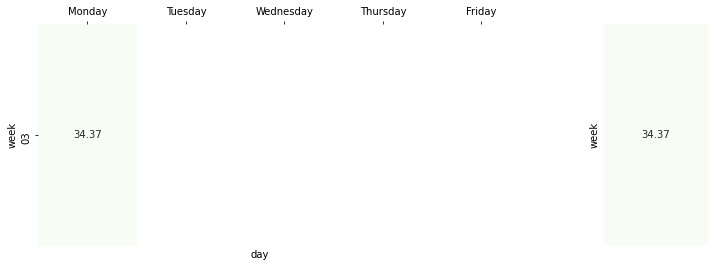

In [226]:
month="January"
create_monthly_heatmap(data, month)
create_month_line_chart(data, month)
monthly_transaction(data, month)

In [227]:
print("*"*100)

****************************************************************************************************


Weekly and Daily results of February
**************************************************
day   Wednesday
week           
08       -79.62
**************************************************



Monthly transaction for February


Transaction,Activity Date,UnderlyingSymbol,Buy,Sell,PnL
1,2021-02-24,AAPL,79.62,0.00,-79.62


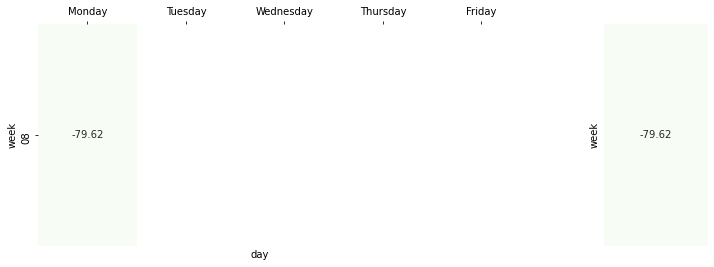

In [229]:
month = "February"
create_monthly_heatmap(data, month)
create_month_line_chart(data, month)
monthly_transaction(data, month)

In [230]:
print("*"*100)

****************************************************************************************************


Weekly and Daily results of March
**************************************************
day   Friday
week        
12     94.37
**************************************************



Monthly transaction for March


Transaction,Activity Date,UnderlyingSymbol,Buy,Sell,PnL
2,2021-03-26,SXC,0.00,94.37,94.37


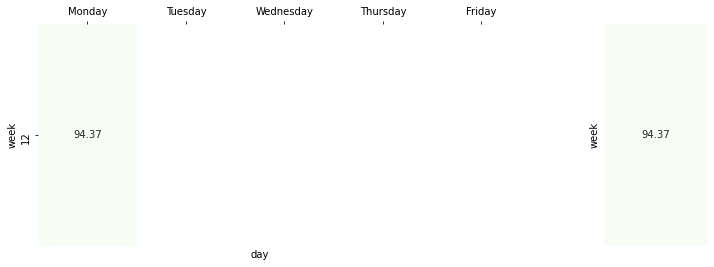

In [231]:
month="March"
create_monthly_heatmap(data, month)
create_month_line_chart(data, month)
monthly_transaction(data, month)

In [232]:
print("*"*100)

****************************************************************************************************


Weekly and Daily results of April
**************************************************
day   Monday  Thursday
week                  
15    -60.47   -110.62
17     64.28      0.00
**************************************************



Monthly transaction for April


Transaction,Activity Date,UnderlyingSymbol,Buy,Sell,PnL
3,2021-04-12,MARA,706.23,645.76,-60.47
4,2021-04-15,SXC,110.62,0.00,-110.62
5,2021-04-26,AMZN,"1,217.62","1,294.37",76.75
6,2021-04-26,NIO,386.23,373.76,-12.47


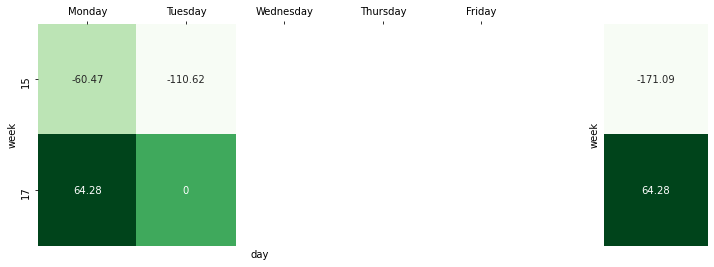

In [233]:
month="April"
create_monthly_heatmap(data, month)
create_month_line_chart(data, month)
monthly_transaction(data, month)

In [234]:
print("*"*100)

****************************************************************************************************


Weekly and Daily results of May
**************************************************
day   Friday  Monday  Thursday  Tuesday  Wednesday
week                                              
18    182.89  307.38      7.28   -47.36    -850.02
19      0.00   47.78   -266.76   -27.22      44.25
20     36.54   -3.98     38.38     0.00      21.75
21      0.00  -61.74      0.00     0.00       0.00
**************************************************



Monthly transaction for May


Transaction,Activity Date,UnderlyingSymbol,Buy,Sell,PnL
7,2021-05-03,DIS,679.45,712.53,33.08
8,2021-05-03,UPS,705.84,980.14,274.30
9,2021-05-04,UPS,341.43,294.06,-47.36
10,2021-05-05,BA,759.84,353.06,-406.78
11,2021-05-05,LOW,681.84,223.06,-458.78
12,2021-05-05,XOM,230.23,245.76,15.53
13,2021-05-06,FB,348.23,351.76,3.53
14,2021-05-06,TSLA,675.62,679.37,3.75
15,2021-05-07,ROKU,460.37,643.26,182.89
16,2021-05-10,AMZN,595.37,614.62,19.25


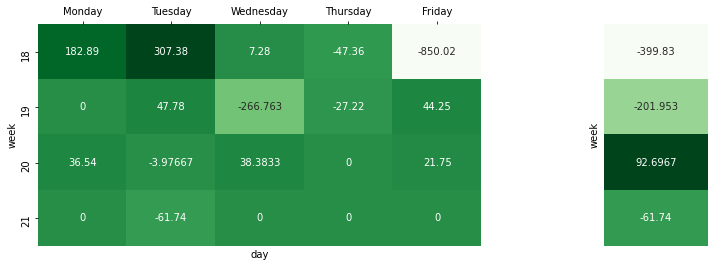

In [235]:
month="May"
create_monthly_heatmap(data, month)
create_month_line_chart(data, month)
monthly_transaction(data, month)

In [236]:
print("*"*100)

****************************************************************************************************


Weekly and Daily results of June
**************************************************
day   Monday  Thursday  Tuesday  Wednesday
week                                      
24      0.00     36.53     0.00       0.00
25    -45.47      0.00     0.00     184.62
26     32.50      0.00    37.03      -3.22
**************************************************



Monthly transaction for June


Transaction,Activity Date,UnderlyingSymbol,Buy,Sell,PnL
28,2021-06-17,AMD,272.73,309.26,36.53
29,2021-06-21,NIO,390.73,345.26,-45.47
30,2021-06-23,AAPL,0.00,184.62,184.62
31,2021-06-28,AMAT,428.37,419.62,-8.75
32,2021-06-28,BBBY,403.37,444.62,41.25
33,2021-06-29,AMD,700.73,739.26,38.53
34,2021-06-29,SBUX,335.37,334.62,-0.75
35,2021-06-29,TSLA,755.37,754.62,-0.75
36,2021-06-30,CMCSA,396.73,407.26,10.53
37,2021-06-30,TSLA,795.37,781.62,-13.75


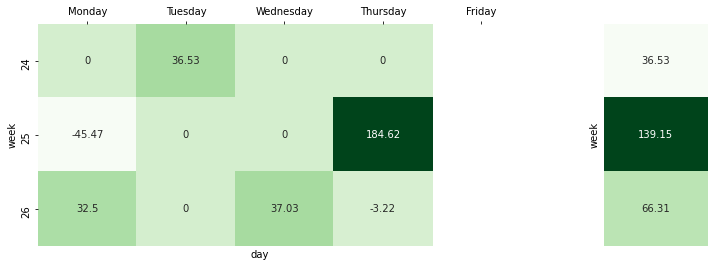

In [237]:
month="June"
create_monthly_heatmap(data, month)
create_month_line_chart(data, month)
monthly_transaction(data, month)

In [238]:
print("*"*100)

****************************************************************************************************


Weekly and Daily results of July
**************************************************
day   Friday  Monday  Thursday  Tuesday  Wednesday
week                                              
26      0.00    0.00   -232.12     0.00       0.00
27     51.14    0.00     -5.75   423.50      69.25
28   -193.75  122.40     47.50     0.00     134.12
29    236.37   48.17   -370.37  -706.87     668.12
30     -2.25 -356.87    302.87  -375.37       9.25
**************************************************



Monthly transaction for July


Transaction,Activity Date,UnderlyingSymbol,Buy,Sell,PnL
38,2021-07-01,MGM,232.37,0.00,-232.37
39,2021-07-01,TSLA,167.37,167.62,0.25
40,2021-07-06,AMZN,890.37,"1,299.62",409.25
41,2021-07-06,TSLA,830.37,844.62,14.25
42,2021-07-07,AMZN,"1,090.37","1,159.62",69.25
43,2021-07-08,AMZN,690.37,684.62,-5.75
44,2021-07-09,AMZN,"1,197.55","1,299.44",101.89
45,2021-07-09,GOOGL,600.37,549.62,-50.75
46,2021-07-12,AMZN,892.04,"1,014.44",122.40
47,2021-07-14,GOOGL,690.37,719.62,29.25


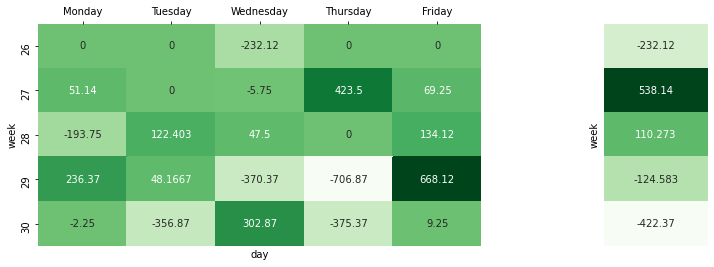

In [239]:
month="July"
create_monthly_heatmap(data, month)
create_month_line_chart(data, month)
monthly_transaction(data, month)

In [240]:
print("*"*100)

****************************************************************************************************


Weekly and Daily results of August
**************************************************
day   Friday  Monday  Thursday  Tuesday  Wednesday
week                                              
31      0.00    0.00     38.87     0.00       0.00
32      0.00    0.00      0.00  -540.37     539.62
33    -45.12    0.00      4.25     0.00       0.00
34    196.49   20.50    -68.12  -190.74     164.62
35      0.00   39.62      0.00     0.00       0.00
**************************************************



Monthly transaction for August


Transaction,Activity Date,UnderlyingSymbol,Buy,Sell,PnL
78,2021-08-05,COIN,0.00,39.62,39.62
79,2021-08-05,FB,220.37,219.62,-0.75
80,2021-08-10,DDOG,540.37,0.00,-540.37
81,2021-08-11,DDOG,0.00,539.62,539.62
82,2021-08-19,TSLA,628.70,632.95,4.25
83,2021-08-20,AAL,104.37,0.00,-104.37
84,2021-08-20,BABA,103.37,162.62,59.25
85,2021-08-23,BABA,253.70,259.95,6.25
86,2021-08-23,TSLA,725.37,739.62,14.25
87,2021-08-24,FB,135.37,0.00,-135.37


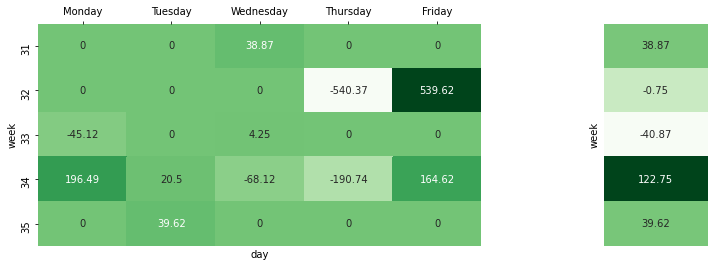

In [241]:
month="August"
create_monthly_heatmap(data, month)
create_month_line_chart(data, month)
monthly_transaction(data, month)

In [242]:
print("*"*100)

****************************************************************************************************


Weekly and Daily results of September
**************************************************
day   Friday  Monday  Thursday  Tuesday
week                                   
36      0.00    0.00      0.00    -2.20
38      4.53    0.00      8.53     0.00
39      0.00 -346.31   -503.44     0.00
**************************************************



Monthly transaction for September


Transaction,Activity Date,UnderlyingSymbol,Buy,Sell,PnL
96,2021-09-07,AAPL,226.09,223.89,-2.20
97,2021-09-23,DIS,332.73,341.26,8.53
98,2021-09-24,UBER,192.73,197.26,4.53
99,2021-09-27,AAPL,360.37,0.00,-360.37
100,2021-09-27,DIS,513.73,529.26,15.53
101,2021-09-27,ORCL,186.73,185.26,-1.47
102,2021-09-30,AAPL,362.55,245.95,-116.60
103,2021-09-30,ARKK,315.37,0.00,-315.37
104,2021-09-30,MSFT,840.73,769.26,-71.47


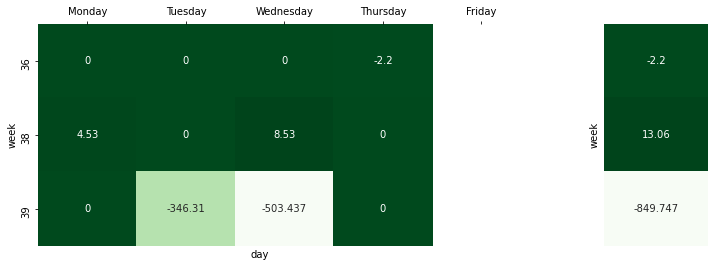

In [243]:
month="September"
create_monthly_heatmap(data, month)
create_month_line_chart(data, month)
monthly_transaction(data, month)

In [244]:
print("*"*100)

****************************************************************************************************


Weekly and Daily results of October
**************************************************
day   Friday  Monday  Thursday  Tuesday  Wednesday
week                                              
39    214.62    0.00      0.00     0.00       0.00
40    -23.22   16.00    -45.75   -26.97       0.78
41      0.00    0.00      0.00    -4.47     131.62
43      0.00    0.00    -12.50     0.00     -25.75
**************************************************



Monthly transaction for October


Transaction,Activity Date,UnderlyingSymbol,Buy,Sell,PnL
105,2021-10-01,AAPL,0.00,214.62,214.62
106,2021-10-04,ARKK,0.00,394.62,394.62
107,2021-10-04,BABA,425.37,439.62,14.25
108,2021-10-04,FB,410.37,0.00,-410.37
109,2021-10-04,MS,151.37,156.62,5.25
110,2021-10-04,SQ,647.37,659.62,12.25
111,2021-10-05,BABA,455.37,0.00,-455.37
112,2021-10-05,FB,0.00,439.62,439.62
113,2021-10-05,MU,278.73,277.26,-1.47
114,2021-10-05,TSLA,595.37,585.62,-9.75


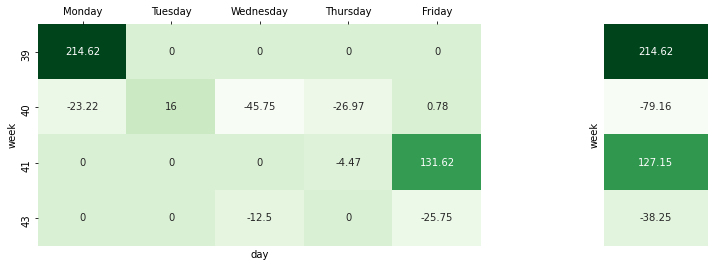

In [245]:
month="October"
create_monthly_heatmap(data, month)
create_month_line_chart(data, month)
monthly_transaction(data, month)

In [246]:
!jupyter nbconvert --to html correlation_of_stocks-Copy1.ipynb --template classic --no-input

[NbConvertApp] Converting notebook correlation_of_stocks-Copy1.ipynb to html
[NbConvertApp] Writing 577049 bytes to correlation_of_stocks-Copy1.html


In [2]:
flights_long = sns.load_dataset("flights")

In [3]:
flights = flights_long.pivot("month", "year", "passengers")

In [4]:
flights

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


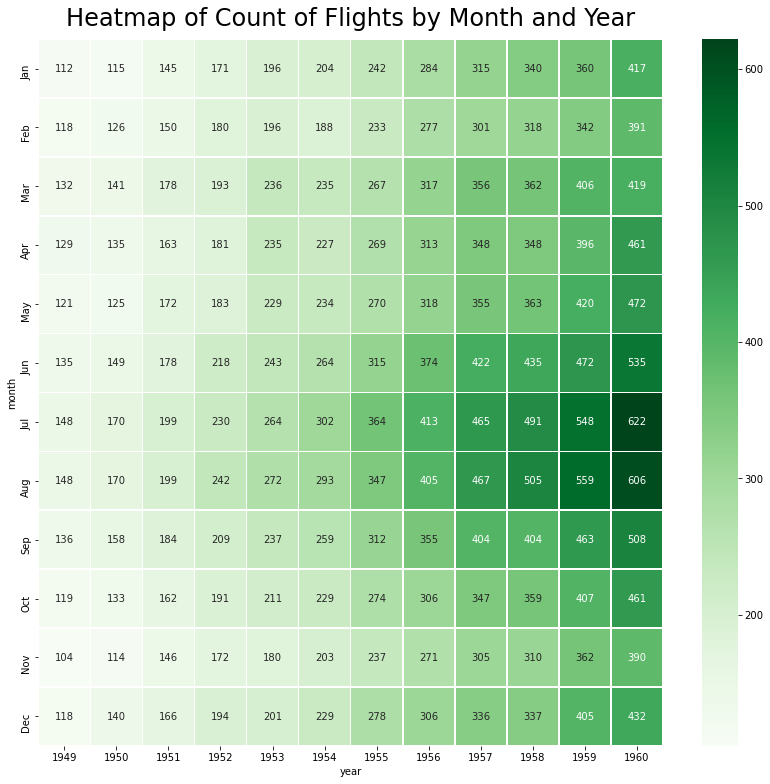

In [5]:
f, ax = plt.subplots(figsize=(14, 13))
sns.heatmap(flights, annot=True, fmt="d", linewidths=.5, ax=ax, cmap="Greens")
ax.axes.set_title("Heatmap of Count of Flights by Month and Year", fontsize=24, y=1.01);